# Detailed Workflow of Multidimensional Scaling in Python

### The University of Texas at Austin, PGE 2020 SURI, Undergraduation Research
### Alan Scherman, Undergraduate Student, Rice University, UT PGE SURI 2020
### Supervised by:
### Michael Pyrcz, Associate Professor, University of Texas at Austin

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

***
### Introduction
**Multidimensional scaling (MDS)** consists in a powerful tool widely used in inferential machine learning to *improve visualization and detection of patterns in highly dimensional, multivariate data sets*. MDS produces a **lower dimension dissimilarity-based projection** (i.e. usually a scatter plot in $2D$) of the high-dimension data set (where each dimension represents an additional feature or variable of measurement). A MDS projection may suggest clustering or ordering patterns between events that would have been otherwise undetectable in high dimensionality space. Geoscientists and statisticians treasure MDS because of its *independence of any distribution assumptions or knowledge of data set values* (i.e. MDS relies only on a distance matrix which details dissimilarity between observations). 

***
### Theory
The beauty of MDS rests on its structural simplicity. If imagined as a function, MDS only requires a distance matrix $D$ (also known as *proximity matrix*) which describes pairwise dissimilarities as input and produces a lower dimensional projection with the best possible representation of the high dimensional discrepancies in $2D$ format. However, the MDS process and results contain some noteworthy peculiarities as explained below:

 - The input dataset can have the same dimensionality as the output projection (e.g. $2D$ data set to $2D$ map), in which case the projection is a perfect representation of the dissimilarities;
 - The distance matrix $D$ may also be computed from pairwise similarity data, in which case the similarities are converted into dissimilarities by the relationship $d_{ij} = \sqrt{s_{ii}+s_{jj}-2s_{ij}}$ where $d$ is events dissimilarity, $s$ is events similarity, and $i$ and $j$ refer to event row and column, respectively;
 - The MDS projection is independent of distribution assumptions;
 - The MDS projection is not unique because it is invariant to translation and rotation (hence MDS assumes centered features).

#### Goodness-of-fit / loss function
In most applications, MDS projects a data set from a higher to a lower set of dimensions (e.g. a $4$ feature data set onto $2D$ Cartesian coordinates), in which case some discrepancy between original event distances and projected event distances is expected. Therefore, *the best MDS projection reduces this loss function so that the projection is as accurate to the original model as is possible*. This loss function minimalization is essential to validate any assumptions drawn from the projection.

One of the most common loss functions or goodness-of-fit measures is Kruskal's First Stress:

<br>
\begin{equation}
\sigma_{K} = \sqrt{\frac{\sum_{i}^{n}\sum_{j,i\neq j}^{n}(x_{ij}-d_{ij})^2}{\sum_{j,i\neq j}^{n}(d_{ij})^2}}
\end{equation}

where $d$ is the original multidimensional dissimilarity, $x$ is the projected MDS distance, and $i$ and $j$ are the rows and the columns of events (note that the projected MDS matrix and $D$ have equal dimensions). Kruskal suggested in his 1964 paper on MDS the following stress thresholds to evaluate the quality of a MDS projection:

|Stress ($\sigma_{K}$)|Goodness-of-Fit|
|:-:|:-:|
|$\geq 0.200$| Poor|
|$\geq 0.100$| Fair|
|$\geq 0.050$| Good|
|$\geq 0.025$| Excellent|
|$0.000$| Perfect|

However, note that these are arbitrary thresholds determined from testing experience and that there are no rigorously-defined thresholds. Depending on the MDS application, technical expertise might say much more about the validity of a MDS model than the table values above. 

Several algorithms which minimize stress, strain, and other loss functions have been proposed since the inception of MDS. Among these, the *SMACOF* algorithm proposed by Kruskal presents itself as a reliable and flexible iterative solution. Nevertheless, the details regarding these optimization algorithms are beyond the scope of this introductory demonstration. More information can be found under the References section.


#### Classical or Metric MDS
As its name foreshadows, classical or metric MDS refers to the first MDS algorithm proposed by W.S. Torgerson in his 1952 inaugural paper on MDS. This type of MDS assumes that the dissimilarities in $D$ are true Euclidean distances which can be computed from any data set by:

<br>
\begin{equation}
d_{ij}=\sqrt{\sum_{k}^{p}(\sum_{i}^{n} \sum_{j}^{n} (x_{ik}-x_{jk})^2)}
\end{equation}

where $d_{ij}$ is the Euclidean distance between events $i$ and $j$, $x_{ik}$ and $x_{jk}$ refer to the value of events $i$ and $j$, respectively, in the $k$ dimension, $n$ is the total number of observations, and $p$ is the total number of features in the data set.

Note that this method is also known as metric MDS because the most common dissimilarity measure, Euclidean distance or L2-norm, satisifies the following criteria for a **metric**:

Given points $x$, $y$, and $z$ in any real dimensional space, a dissimilarity measure $d$ is a metric if it satisfies:
1. $d(x,y) \geq 0$
2. $d(x,y) = 0$ iff $x=y$
3. $d(x,y) = d(y,x)$
4. $d(x,z) \leq d(x,y) + d(y,z)$

Some sources describe classical and metric MDS as different procedures since the latter has a weighting term applied to it. However, because classical and metric MDS share nearly all other steps, we present metric MDS as follows:

1. Compute $D$, an $p-by-p$ square matrix whose entries correspond to the Euclidean distances between any pair of observations (note that $D$ is symmetric and has a zeros diagonal);


2. Calculate $m$, a $p-by-1$ vector whose entries correspond to the weight of each observation (if all weights are equal, then $m_{i} = 1/p$);


3. Determine the centering matrix $C$ by $C = I - 1*m^{T}$, where $I$ is the identity matrix, $1$ is the unity vector, and $m^{T}$ is the transverse of $m$;


4. Calculate the cross-product matrix $S$, where $S = \frac{-1}{2}C*D*C^{T}$


5. Perform the eigendecomposition of $S$ so that the descending-ordered eigenvalues form the diagonal of a null matrix $\Lambda$ and the corresponding normalized eigenvectors are the columns of a matrix $U$;


6. Find the projected MDS coordinates in matrix $F$ by $F = M^{\frac{-1}{2}}*U*\Lambda^{\frac{1}{2}}$, where $M$ is the null matrix with $m$ as the main diagonal, $U$ is the normalized eigenvectors matrix, and $\Lambda$ is the null matrix with the eigenvalues as the main diagonal;


7. Plot the MDS coordinates into the selected number of dimensions; thus, to project an observation into a $2D$ Cartesian plane, take the values in the intersection between the observation's row and the first 2 columns and plot them in different orthogonal coordinates.

An interesting property of the *MDS dimensions is that their variance is equal to that of the eigenvalues of $S$*. Then, because the eigenvalues were sorted in descending order on step $5$, the first MDS dimension (first column of $F$) describes the most variance of the distance data, and the second MDS dimension (second column of $F$) describes the second most variance of the distance data.


#### Non-metric MDS
Non-metric MDS provides a more appealing solution to data sets whose *dissimilarities are not Euclidean distances or whose feature values are not known or quantified*. For instance, psychological studies employ non-metric MDS much more often than the metric counterpart because their data sets usually contain preferences or other subjective answer types (ordinal data). Non-metric MDS relies on other *more complex algorithms* which again lay beyond the scope of this demonstration. Nevertheless, it worth making two remarks about non-metric MDS: 1) the dissimilarities in $D$ are not equivalent to the original distances; rather, they are related by an unknown weakly monotonic function which also accounts for measurement errors and distortions; and 2) non-metric MDS has different versions of loss functions (e.g. strain).

***
### Objective
This demonstration will perform metric MDS on a 4-feature data set (distance to state centroid, population, median income, and mean travel time to work) of 10 Texan and 10 Californian cities. We will also compute Kruskal's stress and apply *sklearn.manifold.MDS* methods to compare our projection with an optimized, non-metric MDS solution.

***
### Load required libraries
We will use some standard Python packages to import, manage, and plot our cities data set. These should come previously installed if you have Anaconda or other similar environment software. 

In [1]:
import numpy as np                                            # To manage NumPy arrays
import pandas as pd                                           # To import and print summary stats for data set
from matplotlib import pyplot as plt                          # Plotting

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 
***
### Import sample data 

Let us start off by importing our data from the *.csv* file to a *pandas.DataFrame*:

The dataset is available [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/CA_TX_cities_data.csv). In the https://github.com/GeostatsGuy/GeoDataSets/ respository on GitHub.

In [24]:
df = pd.read_csv('CA_TX_cities_data.csv', sep=';')
df

,Cities,Distance (km),Population (people),Median Income (USD),Travel to Work (min)
0,Amarillo,477,203245,52543,17.8
1,Austin,202,974581,67462,24.3
2,Corpus Christi,449,326162,55709,19.2
3,Dallas,279,1358066,50100,27.0
4,El Paso,678,681877,45656,22.8
5,Fort Worth,236,894195,59255,27.2
6,Houston,424,2338187,51140,27.4
7,Midland,266,144600,79744,18.8
8,San Antonio,242,1544672,50980,24.4
9,Waco,207,139324,37735,17.5


In case you are unfamiliar with Texan or Californian geography, rows 0-9 correspond to Texan cities and rows 10-19 correspond to Californian cities. These cities were chosen simply because they were the first to come up in a quick Google search. All data is taken from the most recent US Census Bureau information (see source under References section).

The values in the Distances column refer to the Euclidean (straight-line) distance between a city and its state geographical centroid. Therefore, Texan cities have their distance measured to Texas's centroid and Californian cities have their distance measured to California's centroid. The tool used to calculate the centroids and the distances can also be found under the References section.

Note that the features are scaled in different orders of magnitude, so we will standardize the values for each feature. Otherwise, the larger magnitude features will outweigh the impact on the distance between events of smaller magnitude features. 

In order to standardize, let us take advantage of the *pandas* package *mean* and *std* methods. We will standardize each feature to obtain standard normal distributions (Gaussian):

In [25]:
# Recall: standardized value = (original value - mean)/(standard deviation)

df['Distance (km)'] = (df['Distance (km)'] - df['Distance (km)'].mean())/df['Distance (km)'].std()

df['Population (people)'] = (df['Population (people)'] - df['Population (people)'].mean())/df['Population (people)'].std()

df['Median Income (USD)'] = (df['Median Income (USD)'] - df['Median Income (USD)'].mean())/df['Median Income (USD)'].std()

df['Travel to Work (min)'] = (df['Travel to Work (min)'] - df['Travel to Work (min)'].mean())/df['Travel to Work (min)'].std()

df

,Cities,Distance (km),Population (people),Median Income (USD),Travel to Work (min)
0,Amarillo,1.131604,-0.766083,-0.629773,-1.357532
1,Austin,-0.792892,0.069070,0.213792,-0.074980
2,Corpus Christi,0.935655,-0.632997,-0.450758,-1.081290
3,Dallas,-0.254033,0.484282,-0.767908,0.457772
4,El Paso,2.538235,-0.247851,-1.019185,-0.370953
5,Fort Worth,-0.554955,-0.017967,-0.250256,0.497235
6,Houston,0.760701,1.545494,-0.709103,0.536699
7,Midland,-0.345010,-0.829580,0.908253,-1.160216
8,San Antonio,-0.512966,0.686327,-0.718150,-0.055248
9,Waco,-0.757902,-0.835293,-1.467062,-1.416726


The new data frame is now standardized by feature. Note that because we adopted a Gaussian distribution for each feature, the mean for every column is $0$ and the standard deviation is $1$. Still, this data frame alone without further statistical analysis provides little insight into typical Texan and Californian city behavior. In addition, we cannot tell for sure if any Texan or Californian town behaves more like a city in another state (i.e. outliers within state).
***
### Metric Multidimensional Scaling
With our sample data standardized, we can start our metric MDS calculations. We will follow the steps described under the Classical or Metric MDS subsection.

#### Compute $D$
Our imported data is currently a *pandas.DataFrame* of dimensions $20-by-4$. The first step in computing the distance matrix is to convert this dataframe into NumPy format and then apply the Euclidean distance formula to every pair of events. In other words, we want to find every possible distance between two observations in our data set.

In [5]:
cities = df['Cities'].to_numpy()                                            # Store city names in np.array

df = df.drop(labels='Cities',axis=1)
X = df.to_numpy(dtype=np.double)

D = np.zeros(shape=(np.shape(X)[0],np.shape(X)[0]))                         # Pre-allocate D with 20x20 zeros matrix

for i in range(len(D)):                                                     # Span rows
    for j in range(len(D)):                                                 # Span columns
        if i==j:                                                            # Distance of event to itself is null
            continue
        else:
            D[i,j] = np.sqrt((X[j,0]-X[i,0])**2+(X[j,1]-X[i,1])**2+\
                             (X[j,2]-X[i,2])**2+(X[j,3]-X[i,3])**2)         # Euclidean distance
            
print('First row of D is:\n',D[0,:])
print('First column of D is:\n',D[:,0])

First row of D is:
 [0.         2.59955885 0.40554154 2.60726193 1.83634284 2.64354893
 3.01253406 2.14216618 2.5530095  2.06871365 2.38781118 2.20580407
 3.07896636 4.96413178 3.45045438 2.33193245 1.73834079 2.27126321
 4.54756753 4.32457452]
First column of D is:
 [0.         2.59955885 0.40554154 2.60726193 1.83634284 2.64354893
 3.01253406 2.14216618 2.5530095  2.06871365 2.38781118 2.20580407
 3.07896636 4.96413178 3.45045438 2.33193245 1.73834079 2.27126321
 4.54756753 4.32457452]


The full matrix $D$ was not printed out for conciseness. Still, we can verify our resulting matrix by checking if the entries in the first row and first column (or any same ordinal pair of row and column) are identical (since $D$ is symmetric). Also, note that we saved the names under the 'Cities' column for future use.

#### Calculate $m$
For the sake of simplicity, we will adopt a uniform weighting term to all observations. However, depending on the type of analysis, it would be reasonable to imagine heavier masses to more populous or higher income cities.

In [6]:
m = np.ones(shape=(len(D),1))*(1/len(D))

#### Determine centering matrix $C$
There is no secret here, we just need to ensure we are creating $C$ with the right dimensions (i.e. $20-by-20$):

In [7]:
C = np.identity(n=len(m)) - np.full(shape=(len(m),len(m)),fill_value=m)

#### Calculate cross-product matrix $S$
Note that matrix multiplication is associative, so the order in which the multiplations are performed is irrelevant.

In [8]:
S = -0.5*np.matmul(C,np.matmul(D,np.transpose(C)))

#### Perform the eigendecomposition of $S$
We will now do the eigendecomposition of $S$ (i.e. find the eigenvalues and the corresponding eigenvectors). For such task we will employ the *numpy.linalg.eig* function, which outputs a tuple with the ordered eigenvalues in one vector and the normalized corresponding eigenvectors in another array. Recall that $S$, which is $20-by-20$ can have at most 20 distinct eigenvalues. Here another small difference between metric and non-metric MDS factors in: the former disregards any negative eigenvalues as errors. Let us check our eigenvalues:

In [9]:
eigen = np.linalg.eig(S)

print('Eigenvalues are:\n',eigen[0])

Eigenvalues are:
 [ 5.70446814e+00  4.62045049e+00  3.90401069e+00  2.16091355e+00
  1.52491297e+00  1.04931104e+00  9.41608227e-01  8.21025808e-01
  7.53974017e-01 -5.61885462e-16  5.69896220e-01  5.43041391e-01
  4.80631715e-01  1.87121164e-01  1.81061562e-01  2.32970779e-01
  2.46747370e-01  3.15060005e-01  3.79947760e-01  3.48284601e-01]


The printed array shows that $S$ has 20 eigenvalues but one of them (the 10th in the ordered vector) is essentially zero (it is represented as an extremely small negative number for computational reasons). Let us adjust this eigenvalue to zero and proceed:

In [10]:
U = eigen[1]

Lambda = np.where(eigen[0]<=0,0,eigen[0])
print('Eigenvalues are:\n',Lambda)

Eigenvalues are:
 [5.70446814 4.62045049 3.90401069 2.16091355 1.52491297 1.04931104
 0.94160823 0.82102581 0.75397402 0.         0.56989622 0.54304139
 0.48063172 0.18712116 0.18106156 0.23297078 0.24674737 0.31506
 0.37994776 0.3482846 ]


#### Find the projected MDS coordinates
This next step looks daunting because of the multiple matrix operations and the seemingly incoherent output (a $20-by-20$ matrix with MDS coordinates). With regards to the first concern, remember that matrix multiplication is associative and that any square root or inverse operations precede multiplication. Also, note that this step requires us to build two matrices whose diagonals are vectors we previously calculated. These are the mass matrix ($M$) whose diagonal is the vector $m$, and the eigenvalue matrix ($\Lambda$) whose diagonal is the vector of eigenvalues. All other non-diagonal entries are kept as null values. Thus:

In [11]:
scores = np.matmul(np.sqrt(np.linalg.inv(np.diag(m[:,0]))),np.matmul(U,np.sqrt(np.diag(Lambda))))

We call the output of this step *scores*. Each column in *scores* descends from an eigenvalue, and so it indicates some percentage of the variance in the distances matrix ($D$). Because we have already ordered the eigenvalues, the first column of *scores* contains the coordinates of the observations in the MDS dimension with the most variance in distance. Likewise, the second column of *scores* contains the coordinates of the observations in the MDS dimension with the second most variance in distance. This trend repeats itself for the remaining columns of *scores*. 

#### Plot the MDS coordinates
To plot the MDS transformation, we first need to recall what is the purpose of this MDS projection. We originally had a data set of 20 events against 4 features and we seek to visualize this data set behavior in a more friendly 2 dimensional space. Hence, we will take the first two columns of *scores* to plot the projected data in $2D$.

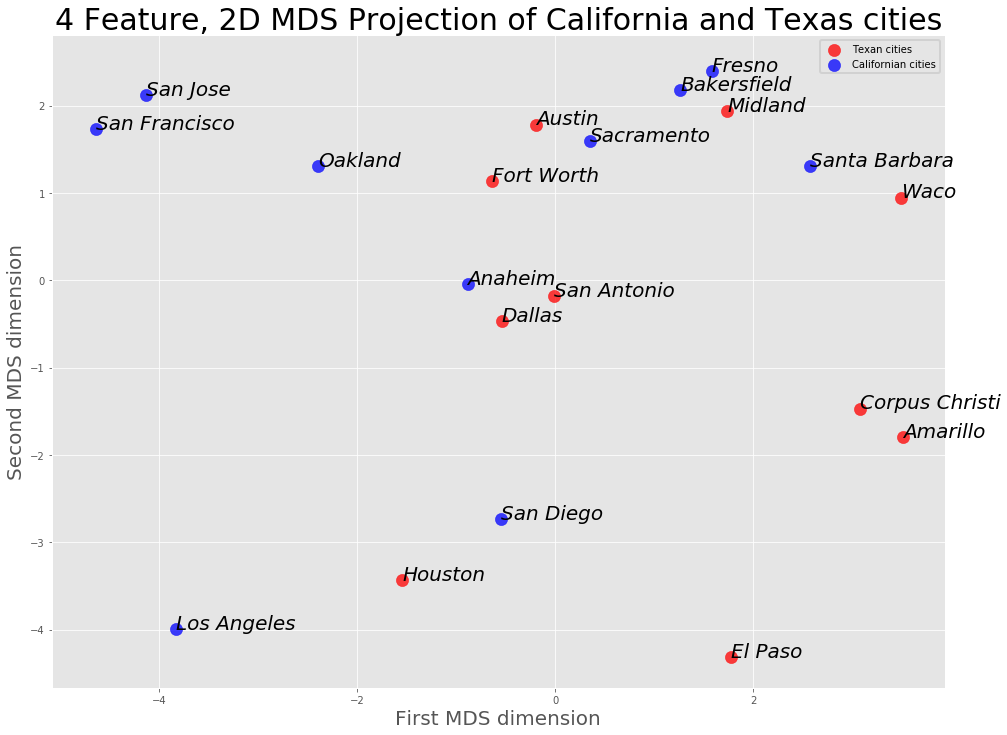

In [12]:
x_proj = scores[:,0]
y_proj = scores[:,1]

plt.style.use('ggplot')
fig1 = plt.figure(figsize=(16,12))
plt.scatter(x_proj[0:10],y_proj[0:10], color='red', label='Texan cities',s=150,alpha=0.75)
plt.scatter(x_proj[10:20],y_proj[10:20], color='blue', label='Californian cities',s=150,alpha=0.75)

for i, txt in enumerate(cities):
    plt.annotate(txt, (x_proj[i], y_proj[i]), size=20, style='italic')

plt.title('4 Feature, 2D MDS Projection of California and Texas cities',size=30)
plt.xlabel('First MDS dimension',size=20)
plt.ylabel('Second MDS dimension',size=20)
legend = plt.legend(); legend.get_frame().set_linewidth(2)
plt.show()

It is important to remark that the *absolute coordinates of the observations in the MDS projected space have no statistical meaning*. Metric MDS strives to preserve as best as possible the original multidimensional distances between data points in a lower-dimensional space.

At a first glance, the MDS projection above looks pretty disappointing. Other than some curious pairwise observations (e.g. both state capitals - Austin and Sacramento - and cities in oil hotspots - Midland and Bakersfield - are close together), the projection has both groups of cities overlapping for the most part. No distinct clusters can be identified. Even the pairwise observations can be explained by a social scientist with enough data and real-world understanding. 

Let us dig a little deeper and, in addition to classifying the events by their state, let us also scale their sizes by feature intensity:

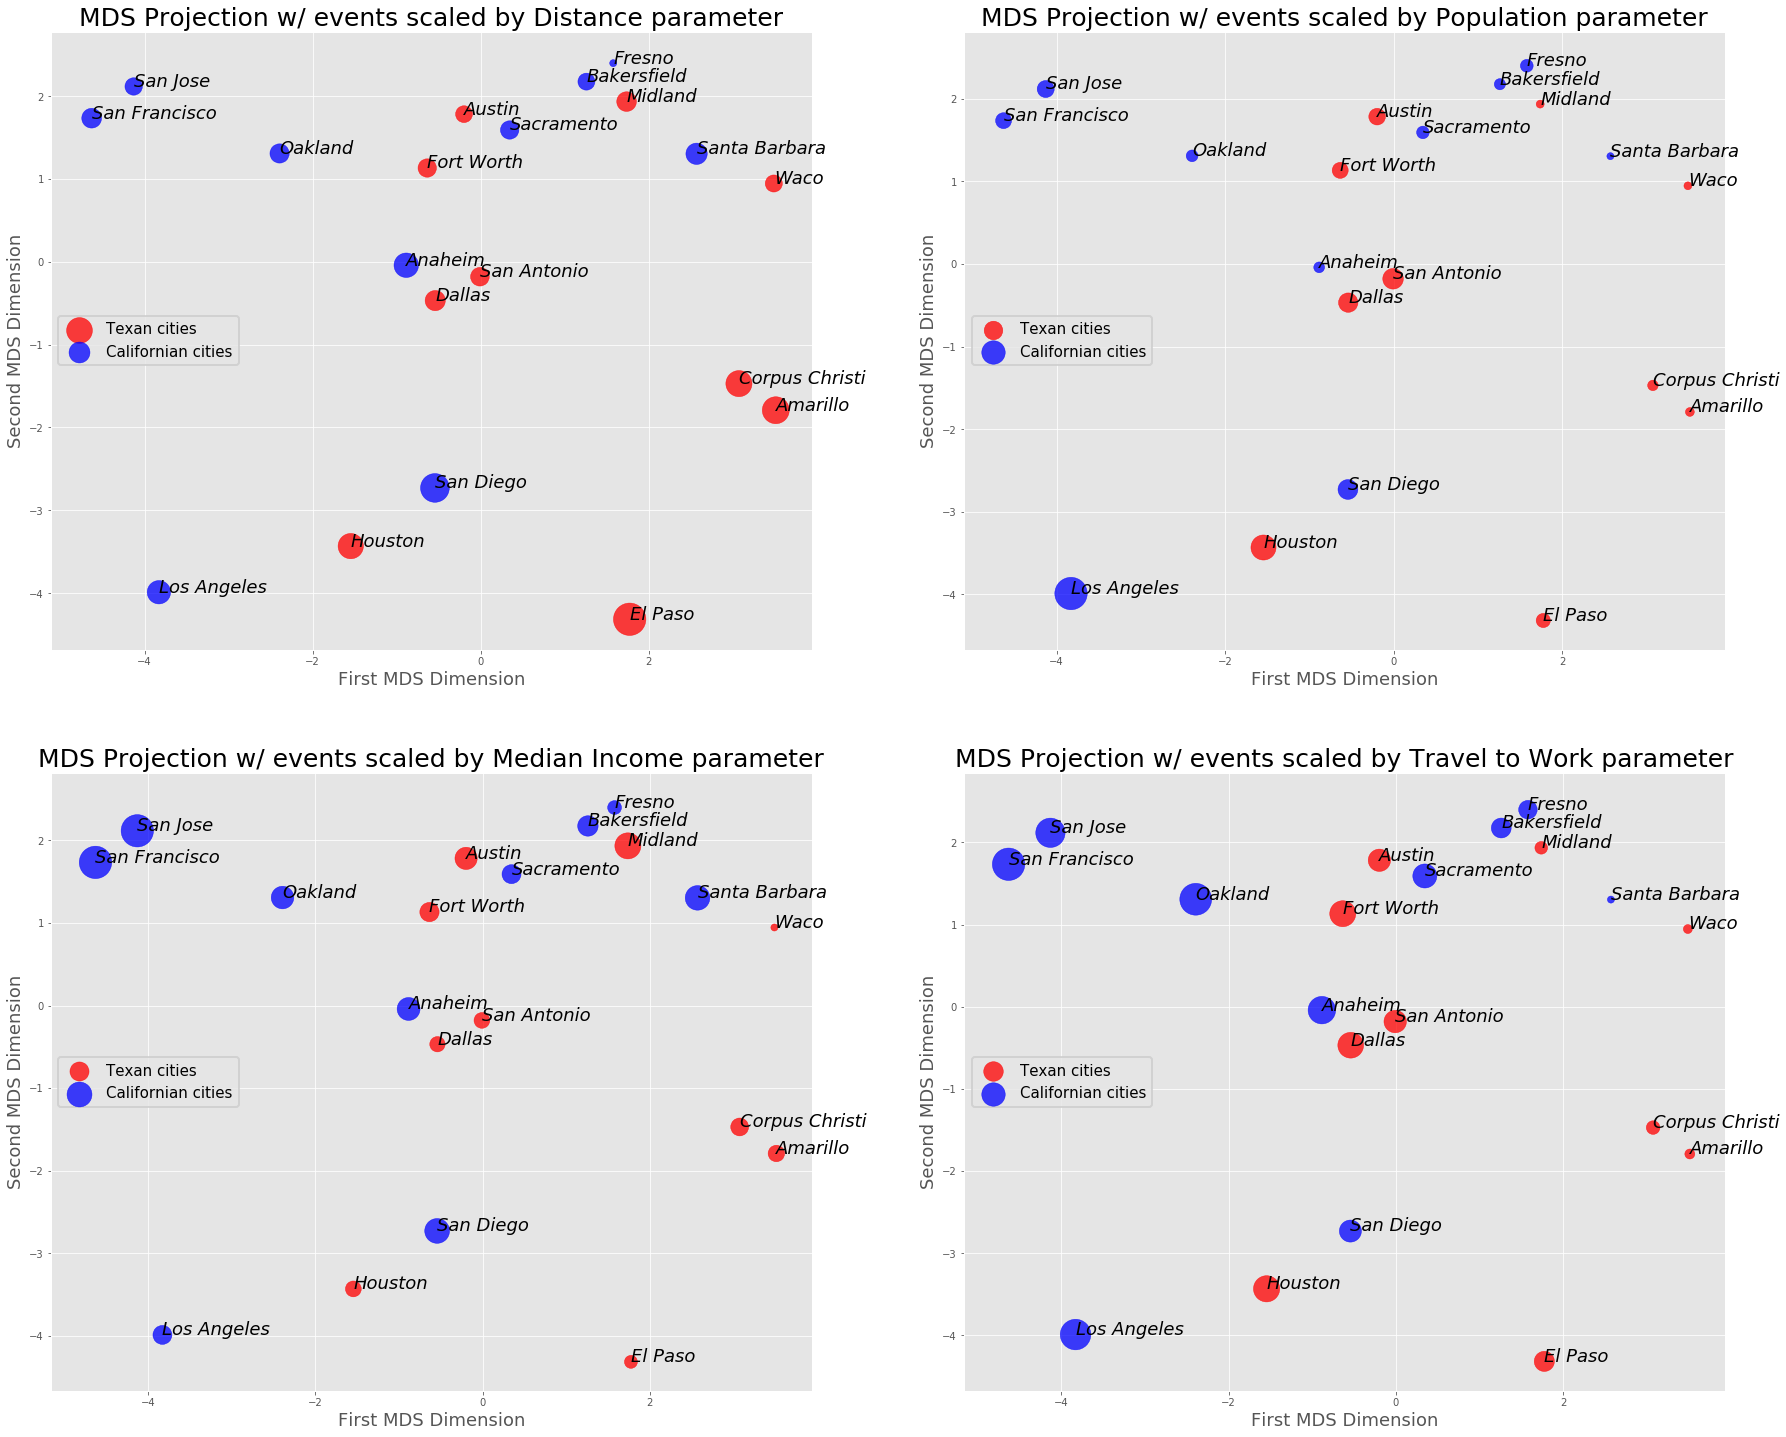

In [13]:
fig, [[sct1, sct2], [sct3, sct4]] = plt.subplots(2,2,figsize=(30,25))

# Normalizing feature observations to 0-1 range 
s1 = (X[:,0] - min(X[:,0]))/(max(X[:,0] - min(X[:,0])))+0.05
s2 = (X[:,1] - min(X[:,1]))/(max(X[:,1] - min(X[:,1])))+0.05
s3 = (X[:,2] - min(X[:,2]))/(max(X[:,2] - min(X[:,2])))+0.05
s4 = (X[:,3] - min(X[:,3]))/(max(X[:,3] - min(X[:,3])))+0.05

# MDS scaled by distance feature
sct1.scatter(x_proj[0:10],y_proj[0:10],s=1000*s1[0:10],label='Texan cities',color='red',alpha=0.75)
sct1.scatter(x_proj[10:20],y_proj[10:20],s=1000*s1[10:20],label='Californian cities',color='blue',alpha=0.75)
sct1.set_title('MDS Projection w/ events scaled by Distance parameter',size=25)
sct1.set_xlabel('First MDS Dimension',size=18)
sct1.set_ylabel('Second MDS Dimension',size=18)
legend = sct1.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

# MDS scaled by population feature
sct2.scatter(x_proj[0:10],y_proj[0:10],s=1000*s2[0:10],label='Texan cities',color='red',alpha=0.75)
sct2.scatter(x_proj[10:20],y_proj[10:20],s=1000*s2[10:20],label='Californian cities',color='blue',alpha=0.75)
sct2.set_title('MDS Projection w/ events scaled by Population parameter',size=25)
sct2.set_xlabel('First MDS Dimension',size=18)
sct2.set_ylabel('Second MDS Dimension',size=18)
legend = sct2.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

# MDS scaled by median income feature
sct3.scatter(x_proj[0:10],y_proj[0:10],s=1000*s3[0:10],label='Texan cities',color='red',alpha=0.75)
sct3.scatter(x_proj[10:20],y_proj[10:20],s=1000*s3[10:20],label='Californian cities',color='blue',alpha=0.75)
sct3.set_title('MDS Projection w/ events scaled by Median Income parameter',size=25)
sct3.set_xlabel('First MDS Dimension',size=18)
sct3.set_ylabel('Second MDS Dimension',size=18)
legend = sct3.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

# MDS scaled by travel to work feature
sct4.scatter(x_proj[0:10],y_proj[0:10],s=1000*s4[0:10],label='Texan cities',color='red',alpha=0.75)
sct4.scatter(x_proj[10:20],y_proj[10:20],s=1000*s4[10:20],label='Californian cities',color='blue',alpha=0.75)
sct4.set_title('MDS Projection w/ events scaled by Travel to Work parameter',size=25)
sct4.set_xlabel('First MDS Dimension',size=18)
sct4.set_ylabel('Second MDS Dimension',size=18)
legend = sct4.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

# Add name tags to cities
for i,txt in enumerate(cities):
    sct1.annotate(txt, (x_proj[i], y_proj[i]), size=18, style='italic')
    sct2.annotate(txt, (x_proj[i], y_proj[i]), size=18, style='italic')
    sct3.annotate(txt, (x_proj[i], y_proj[i]), size=18, style='italic')
    sct4.annotate(txt, (x_proj[i], y_proj[i]), size=18, style='italic')

The feature-scaled graphs reveal some clusters or at least tendencies in the original data set. For the distance-scaled plot, cities with greater distance to state centroid tend to group in the bottom half of the plot (remember this grouping could exist elsewhere because MDS is blind to orientation). For the population-scaled map, population seems to increase as one moves diagonally to the bottom left corner and to decrease towards the top right corner. For the income-scaled plot, median income appears to increase as one moves up (increases second MDS dimension in this orientation). For the travel time scaled plot, cities with higher mean travel time to work seem to congregate above the diagonal going from the bottom left to the top right.

Let us also experiment removing one of the features (e.g. distance to state centroid) and running metric MDS again. The steps are the same from before, but everything after the distance matrix with exception of the weight vector and the centering matrix needs to be recalculated:

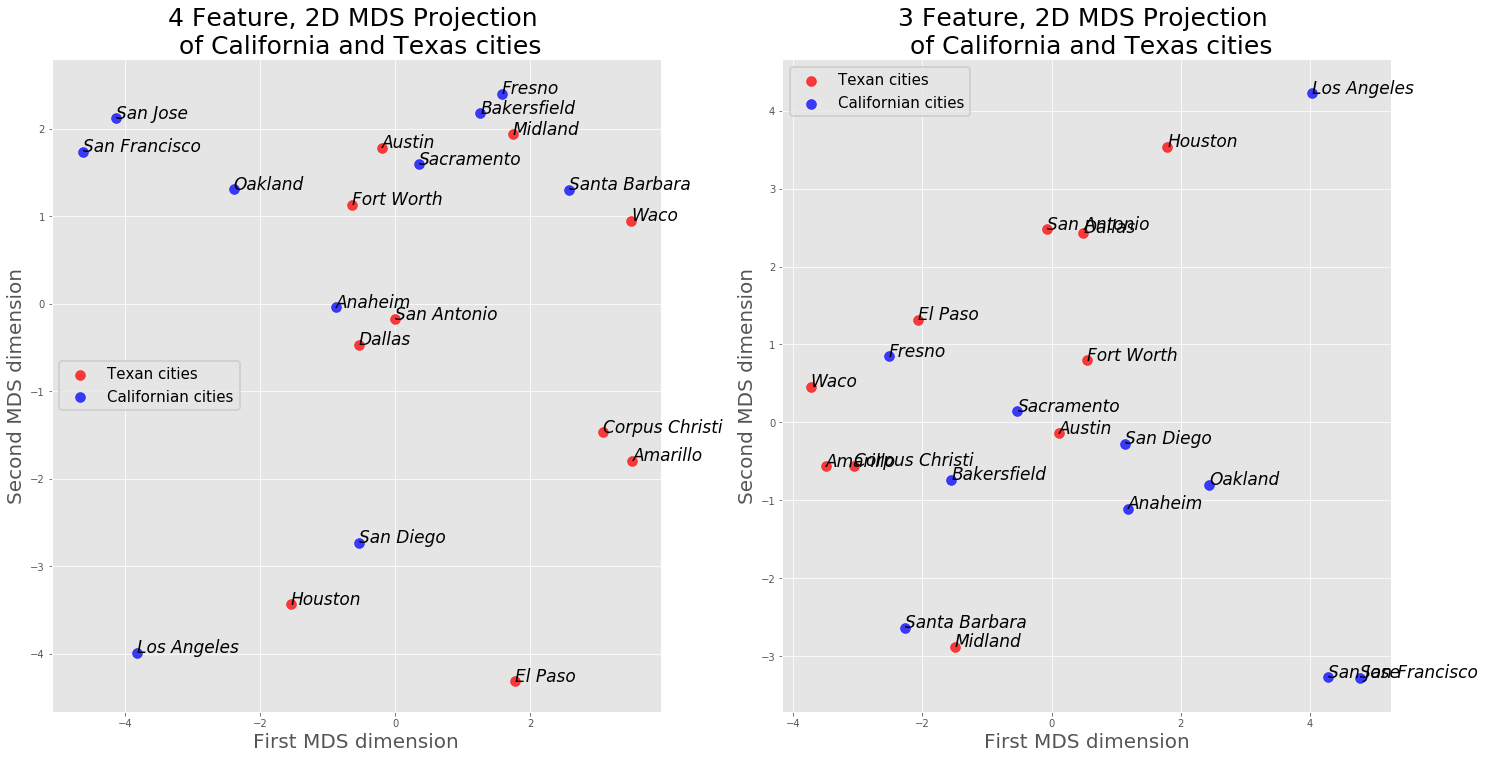

In [14]:
X2 = np.delete(X,0,1)                                                        # Delete first column (distances feature)

D2 = np.zeros(shape=(np.shape(X2)[0],np.shape(X2)[0]))                       # Pre-allocate D2 with 20x20 zeros matrix

for i in range(len(D2)):                                                     # Span rows
    for j in range(len(D2)):                                                 # Span columns
        if i==j:                                                             # Distance of event to itself is null
            continue
        else:
            D2[i,j] = np.sqrt((X2[j,0]-X2[i,0])**2+(X2[j,1]-X2[i,1])**2+\
                             (X2[j,2]-X2[i,2])**2) 
            
# m and C are the same

# Cross-product matrix
S2 = -0.5*np.matmul(C,np.matmul(D2,np.transpose(C)))

# Find eigenvalues and eigenvectors
eigen2 = np.linalg.eig(S2)
Lambda2 = np.where(eigen2[0]<=0,0,eigen2[0])
U2 = eigen2[1]

# Eigendecomposition
scores2 = np.matmul(np.sqrt(np.linalg.inv(np.diag(m[:,0]))),np.matmul(U2,np.sqrt(np.diag(Lambda2))))

# Assigning MDS coordinates
x_proj2 = scores2[:,0]
y_proj2 = scores2[:,1]

# Plotting both projections
fig, [sct1,sct2] = plt.subplots(1,2,figsize=(24,12))

sct1.scatter(x_proj[0:10],y_proj[0:10], color='red', label='Texan cities',s=100,alpha=0.75)
sct1.scatter(x_proj[10:20],y_proj[10:20], color='blue', label='Californian cities',s=100,alpha=0.75)

sct1.set_title('4 Feature, 2D MDS Projection \n of California and Texas cities',size=25)
sct1.set_xlabel('First MDS dimension',size=20)
sct1.set_ylabel('Second MDS dimension',size=20)
legend = sct1.legend(loc='center left',fontsize=15); legend.get_frame().set_linewidth(2)

sct2.scatter(x_proj2[0:10],y_proj2[0:10], color='red', label='Texan cities',s=100,alpha=0.75)
sct2.scatter(x_proj2[10:20],y_proj2[10:20], color='blue', label='Californian cities',s=100,alpha=0.75)

sct2.set_title('3 Feature, 2D MDS Projection \n of California and Texas cities',size=25)
sct2.set_xlabel('First MDS dimension',size=20)
sct2.set_ylabel('Second MDS dimension',size=20)
legend = sct2.legend(fontsize=15); legend.get_frame().set_linewidth(2)

for i, txt in enumerate(cities):
    sct1.annotate(txt, (x_proj[i], y_proj[i]), size=17, style='italic')
    sct2.annotate(txt, (x_proj2[i], y_proj2[i]), size=17, style='italic')

The new 3-feature MDS projection shows a rather different global arrangement of the cities, but preserves many of the projected distances between them. For some pairs of cities (e.g. San Jose and San Francisco or Corpus Christi and Amarillo), the removal of the distance feature actually reveals more similarities between them. However, for other pairs like Anaheim and Dallas, the deletion of the distance variable increases the projected dissimilarity between cities. Lastly, the new MDS projection reveals more similarities between cities that are geographically situated far away from state centroids (e.g. El Paso) and others. Note that because California and Texas are both territorially large states with cities relatively well spread along their areas, the impact of removing the distance feature is limited. Nevertheless, if another smaller state were present, like Alabama or Illinois, removing the distance feature could prove meaningful in the appearance of clusters and identification of trends.

Nevertheless, one might argue that finding patterns in data is just a matter of digging deep enough. The tendencies observed might just be correlations and so we must not jump the hedge and draw causation relations between a feature and MDS clusters. Last but not least, we must compute the goodness-of-fit for this MDS projection so we know how concrete our inferences are.

***
### Kruskal Stress 
The plots above provided neat visualizations and some pattern inferences about our $4D$ data set, but we must evaluate how well the projected MDS distances reflect the original dissimilarities between events in higher-dimensional space. For such task we will compute Kruskal's Stress using the formula provided under the Theory section. 

However, note that the Kruskal Stress formula requires projected pairwise distances. Currently, we only have the *scores* matrix which represents projected coordinates and not pairwise distances. We can obtain the projected distances with some for-loops and the Euclidean distance formula:

In [15]:
proj_dists = np.zeros(shape=(np.shape(D)))

for i in range(len(D)):
    for j in range(len(D)):
        if i==j:
            continue                                                                     # Distance of event to itself is null
        else:
            proj_dists[i,j] = np.sqrt((scores[j,0]-scores[i,0])**2 + (scores[j,1]-scores[i,1])**2)        # Euclidean distance

Now, we can apply the Kruskal Stress formula where the $x_{ij}$ values come from *proj_dists* and the $d_{ij}$ values from the $D$ matrix:

In [16]:
num = 0; den = 0                                            # Preallocating numerator and denominator

for i in range(len(D)):                                     # Span rows
    for j in range(len(D)):                                 # Span columns
        if i==j:
            continue
        else:
            num += (proj_dists[i,j] - D[i,j])**2
            den += (D[i,j])**2
            
stress = np.sqrt(num/den)
print('Kruskal First Stress is: ',stress)

Kruskal First Stress is:  0.6969023121247289


If we take the conventional threshold values set by Kruskal (see Theory section), this metric MDS projection ranks poorly (*stress* $\geq 0.2$). In other words, there is some significant distortion between the sets of original and MDS distances. This unevenness may disqualify some of our pattern inferences made in the previous section and lead us to reconsider if metric MDS is the best analysis methodology at our disposal. 

Another form of determining if the projection is accurate is to plot the projected pairwise distances (stored in *proj_dists*) against the original pairwise distances (stored in *D*) in a scatter plot. A zero stress projection would make the scattered data exhibit linear behavior (i.e. data points would follow $y=x$ line). In our case:

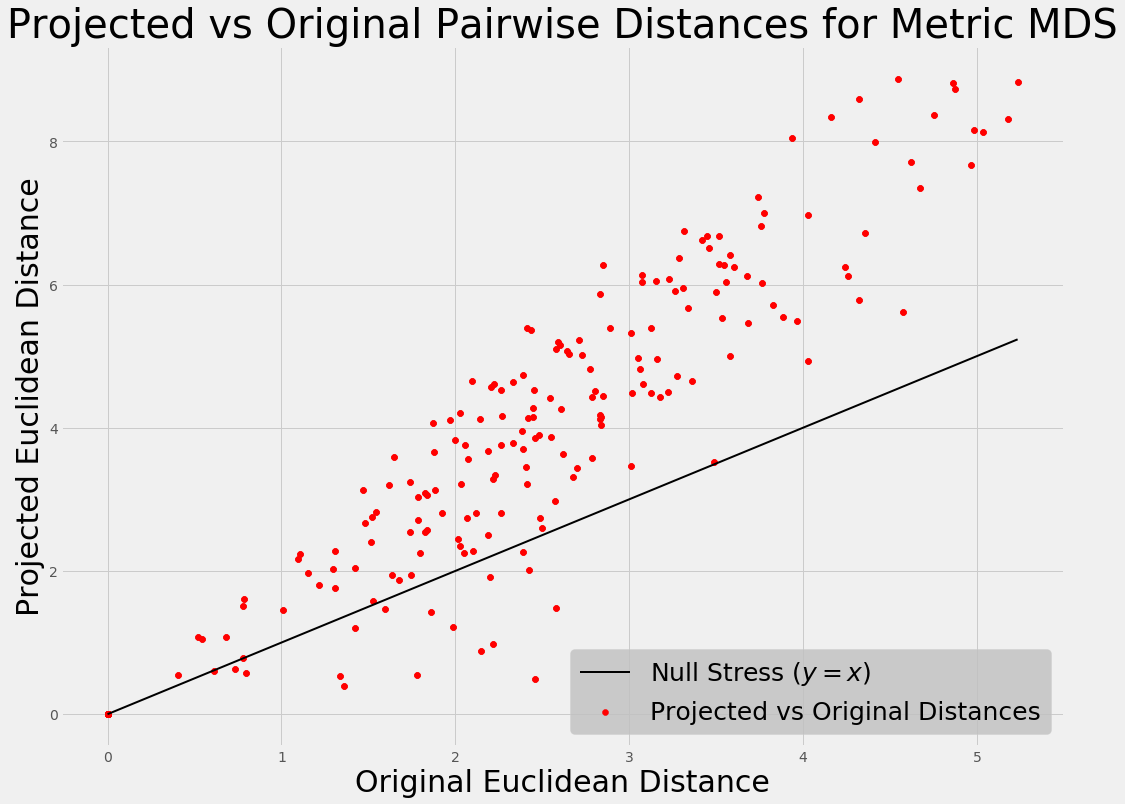

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,12))

plt.scatter(D,proj_dists,label='Projected vs Original Distances',color='red')
plt.plot(np.max(D)*np.array([0,1]),np.max(D)*np.array([0,1]),color='black',linewidth=2,label=r'Null Stress ($y=x$)')

plt.title('Projected vs Original Pairwise Distances for Metric MDS',size=40);
plt.xlabel('Original Euclidean Distance',size=30,color='black');
plt.ylabel('Projected Euclidean Distance',size=30,color='black');
plt.legend(loc='lower right',facecolor = '#C0C0C0', fontsize = 25);

The data in the scatter plot exhibit somewhat linear behavior, but not about the null stress line $y=x$. The more the data moves away from the null stress line, the less preserved are the original dissimilarities between events in higher-dimensional space.
***
### sklearn.manifold.MDS
Still, we can validate our metric MDS projection by comparing it against a non-metric MDS projection generated by *sklearn.manifold.MDS*. We will not dive into the details of this MDS tool, but it is important to state that *sklearn* contains powerful algorithms capable of iteratively optimizing the projection's Kruskal stress. Let us import the MDS module and look at its docstring:

In [18]:
from sklearn.manifold import MDS
print(MDS.__doc__)

Multidimensional scaling

    Read more in the :ref:`User Guide <multidimensional_scaling>`.

    Parameters
    ----------
    n_components : int, optional, default: 2
        Number of dimensions in which to immerse the dissimilarities.

    metric : boolean, optional, default: True
        If ``True``, perform metric MDS; otherwise, perform nonmetric MDS.

    n_init : int, optional, default: 4
        Number of times the SMACOF algorithm will be run with different
        initializations. The final results will be the best output of the runs,
        determined by the run with the smallest final stress.

    max_iter : int, optional, default: 300
        Maximum number of iterations of the SMACOF algorithm for a single run.

    verbose : int, optional, default: 0
        Level of verbosity.

    eps : float, optional, default: 1e-3
        Relative tolerance with respect to stress at which to declare
        convergence.

    n_jobs : int or None, optional (default=None)
        T

There is a lot of information in the docstring above, but the relevant parts to us are: (1) the parameter *n_components*, which establishes the dimensionality of the MDS projection; and (2) the attribute *fit_transform()*, which performs an operation similar to step 6 in the metric MDS subsection to obtain the *scores* coordinates matrix. 

In [19]:
n_components = 2                                                                 # MDS projection dimensionality

embedding = MDS(n_components=2,random_state=20348, dissimilarity='precomputed')  # dissimilarity parameter shows D is already known
nm_scores = embedding.fit_transform(D)

print('MDS projected coordinates matrix (nm_matrix) has dimensions: ', np.shape(nm_scores))

MDS projected coordinates matrix (nm_matrix) has dimensions:  (20, 2)


Note that we assign a seed (*random_state*) argument to the MDS command. This will ensure that we will always get the same orientation for the MDS projection. The *nm_scores* matrix (similar to the *scores* matrix) has the expected dimensions and it indicates the projected event coordinates. Then:

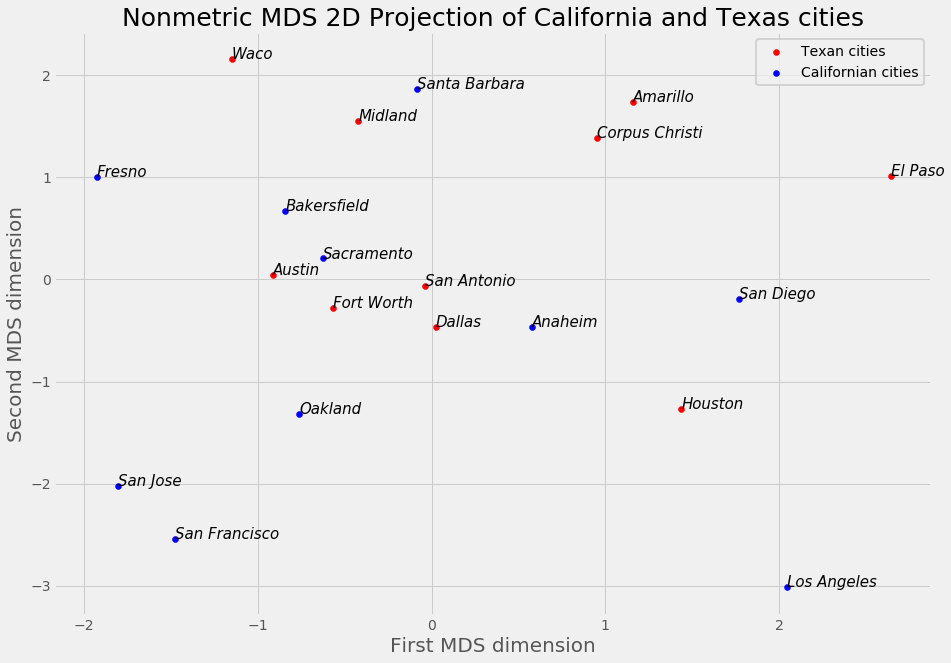

In [20]:
nm_x_proj = nm_scores[:,0]
nm_y_proj = nm_scores[:,1]

plt.figure(figsize=(14,10))
plt.scatter(nm_x_proj[0:10],nm_y_proj[0:10], color='red', label='Texan cities')
plt.scatter(nm_x_proj[10:20],nm_y_proj[10:20], color='blue', label='Californian cities')

for i, txt in enumerate(cities):
    plt.annotate(txt, (nm_x_proj[i], nm_y_proj[i]), size=15, style='italic')

plt.title('Nonmetric MDS 2D Projection of California and Texas cities',size=25)
plt.xlabel('First MDS dimension',size=20)
plt.ylabel('Second MDS dimension',size=20)
legend = plt.legend(); legend.get_frame().set_linewidth(2)
plt.show()

An untrained eye might conclude upon seeing this nonmetric MDS projection that the metric equivalent we computed was completely erroneous. Nonetheless, recall from the Theory section that **MDS projections are invariant to translation and rotation**, so we can adjust the rotation of either metric or nonmetric MDS projection to have matching orientations. Note that in the nonmetric projection Los Angeles is in the bottom right corner and El Paso in the top right, while in the metric projection the former is in the bottom left and the latter in the bottom right. Hence, if we **rotate the nonmetric MDS projection clockwise by 90$^{\circ}$** (or equivalently rotate the metric projection counterclockwise by 90 $^{\circ}$), then both projections will have the same orientation. Let us see an overlapped plot of both metric and nonmetric MDS where the *squares represent metric MDS events* and the *circles represent nonmetric MDS events*.

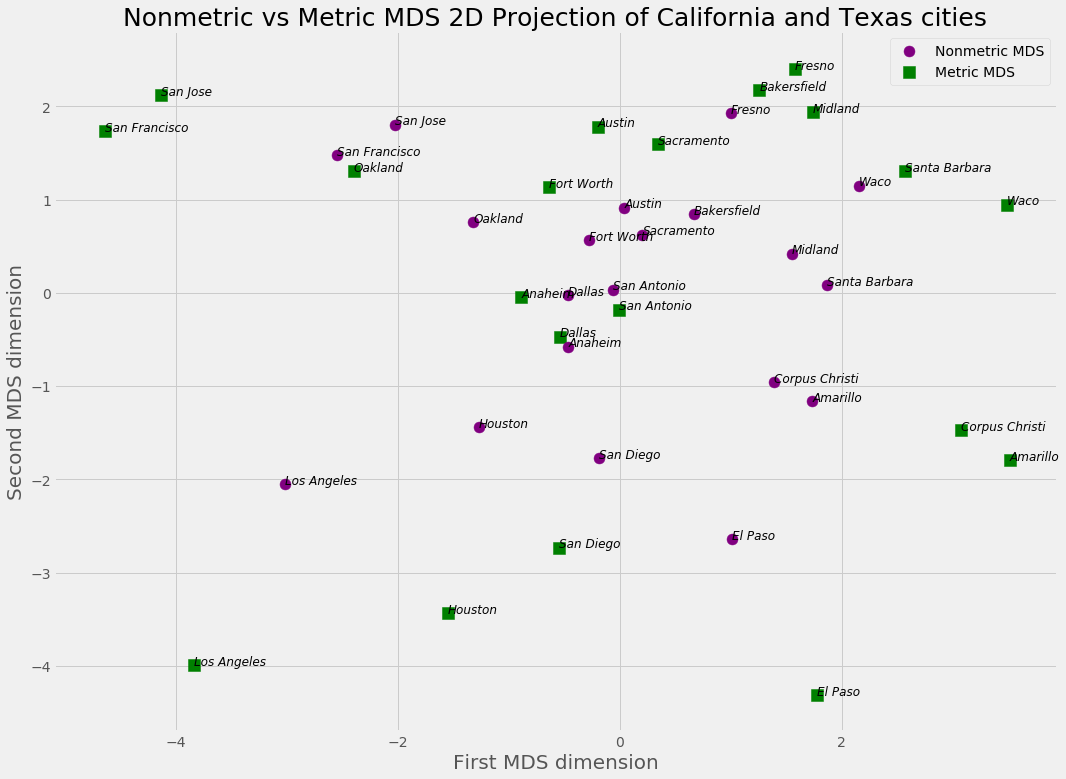

In [21]:
plt.figure(figsize=(16,12))

nm_scores = np.matmul(nm_scores,np.array([[0,-1],[1,0]]))       # Rotate nonmetric projection by 90 degrees clockwise
nm_x_proj = nm_scores[:,0]; nm_y_proj = nm_scores[:,1]

for i, txt in enumerate(cities):
    plt.scatter(nm_x_proj[i],nm_y_proj[i], color='purple', marker='o',s=120)    # Plot nonmetric MDS
    plt.scatter(x_proj[i],y_proj[i], color='green', marker='s',s=150)           # Plot metric MDS
    plt.annotate(txt, (nm_x_proj[i], nm_y_proj[i]), size=12, style='italic')
    plt.annotate(txt, (x_proj[i], y_proj[i]), size=12, style='italic')
    
plt.title('Nonmetric vs Metric MDS 2D Projection of California and Texas cities',size=25);
plt.xlabel('First MDS dimension',size=20);
plt.ylabel('Second MDS dimension',size=20);
plt.legend(('Nonmetric MDS', 'Metric MDS'));

The overlapping plot validates the locations of most metric MDS projections. For instance, the pairs Corpus Christi and Amarillo and San Francisco and San Jose remain close neighbors in both projections. Observe that the cities farther away from the main cluster (e.g. Los Angeles and El Paso) show more discrepancies between projections. Furthermore, the nonmetric projections seem to concentrate more about the MDS plane's origin whilst the metric events seem more scattered. Nonetheless, the projections have many subtle arrangement differences which depending on the MDS application might prove relevant or not.

Again, the nonmetric MDS does not reveal any extraordinary clusters or tendencies that could lead to astounding discoveries. Yet, some interesting patterns and individual city behavior can be drawn. First, four out of Texas's 5 most populated cities (Austin, Dallas, Fort Worth, and San Antonio) stand close to one another in the middle of the projection. Houston appears as the outlier, behaving more like San Diego or Los Angeles than its fellow Texan cities. Second, Santa Barbara and Anaheim (both in California) behave much alike other Texan cities. Third, El Paso sits far away from other Texan cities (and from much else too).

Finally, let us compute the Kruskal stress of the nonmetric MDS projection:

In [22]:
nm_proj_dists = np.zeros(shape=(np.shape(D)))

for i in range(len(D)):
    for j in range(len(D)):
        if i==j:
            continue                                                               # Distance of event to itself is null
        else:
            nm_proj_dists[i,j] = np.sqrt((nm_scores[j,0]-nm_scores[i,0])**2 + \
                                         (nm_scores[j,1]-nm_scores[i,1])**2)       # Euclidean distance
            
num = 0; den = 0                                                                   # Preallocating numerator and denominator

for i in range(len(D)):                                                            # Span rows
    for j in range(len(D)):                                                        # Span columns
        if i==j:
            continue
        else:
            num += (nm_proj_dists[i,j] - D[i,j])**2
            den += (D[i,j])**2
            
stress = np.sqrt(num/den)
print('Kruskal First Stress is: ',stress)

Kruskal First Stress is:  0.16322637055453249


And the projected pairwise distances against the original pairwise distances scatter plot:

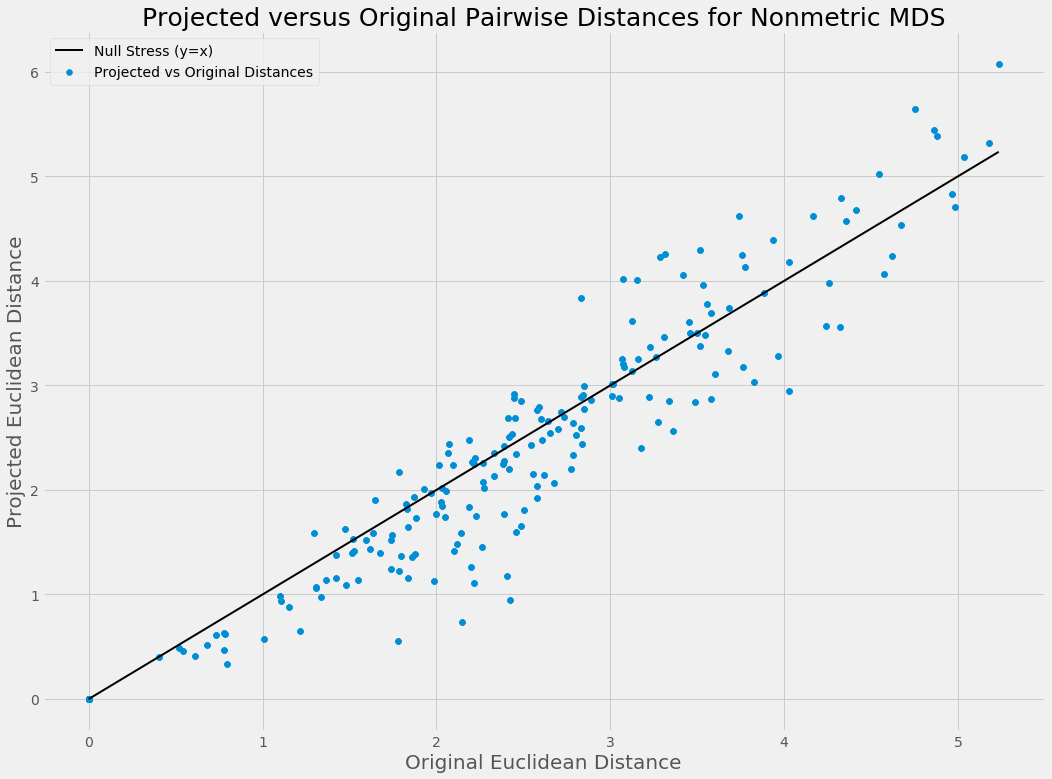

In [23]:
plt.figure(figsize=(16,12))

plt.scatter(D,nm_proj_dists,label='Projected vs Original Distances')
plt.plot(np.max(D)*np.array([0,1]),np.max(D)*np.array([0,1]),color='black',linewidth=2,label='Null Stress (y=x)')

plt.title('Projected versus Original Pairwise Distances for Nonmetric MDS',size=25);
plt.xlabel('Original Euclidean Distance',size=20);
plt.ylabel('Projected Euclidean Distance',size=20);
plt.legend();

This time the linear trend formed by the projected versus original pairwise distances is clear. It is not a perfect fit because the Kruskal stress is not null, but the linear trend about $y=x$ attests to the fact that the nonmetric MDS projection preserves the dissimilarity better than its metric counterpart.

***
### References
This workflow covered a range of topics pertaining to MDS theory, demographic and geographic data, and Python utilities for MDS. There is so much more to learn about these areas, so please check out the list below for further information:

1. [Metric MDS step-by-step](https://personal.utdallas.edu/~herve/Abdi-MDS2007-pretty.pdf)
2. [Stress measurements](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Multidimensional_Scaling.pdf)
3. [MDS overview, SMACOF algorithm, and MDS in R](https://mran.microsoft.com/snapshot/2018-05-08/web/packages/smacof/vignettes/smacof.pdf)
4. [Interpreting MDS projections](http://www.analytictech.com/borgatti/mds.htm)
5. [Dr. Michael Pyrcz's lecture on MDS](https://www.youtube.com/watch?v=Yt0o8ukIOKU)
6. [Distance matrices](https://medium.com/swlh/euclidean-distance-matrix-4c3e1378d87f)
7. [US Census Bureau data](https://www.census.gov/programs-surveys/sis/resources/data-tools/quickfacts.html)
8. [List of US State Centroids](https://en.wikipedia.org/wiki/List_of_geographic_centers_of_the_United_States)
9. [sklearn.manifold.MDS Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) 

#### Work was supervised by Professor Pyrcz as part of the Summer Undergraduate Research Project (SURI) at The University of Texas at Austin.  See below for more information about Professor Pyrcz.

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  